## 1 整体情况

查看default=0和default=1的样本量各是多少

In [1]:
import pandas as pd


data=pd.read_excel('/Users/ycy/Documents/project/default_of_credit_card_clients/default_of_credit_card_clients_2.xls', header=0,skiprows=[0],index_col=[0])
y_out=data.groupby('default payment next month').size()
print(y_out)

default payment next month
0    23364
1     6636
dtype: int64


将data的最后一列‘default payment next month’单拎出来，并令‘1=yes’，‘0=no’

In [2]:
data.loc[:,'default payment next month'][data['default payment next month']==1] = 'yes'
data.loc[:,'default payment next month'][data['default payment next month']==0] = 'no'
#data.loc[:,'default payment next month']

## 2 绘制连续变量的密度图

x1显示给定贷方金额与default的关系，x5显示年龄与default的关系

In [4]:
x1=data.loc[:,['LIMIT_BAL','default payment next month']]
x5=data.loc[:,['AGE','default payment next month']]
#print(x1)
#print(x5)

### 2.1 给定贷方金额

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


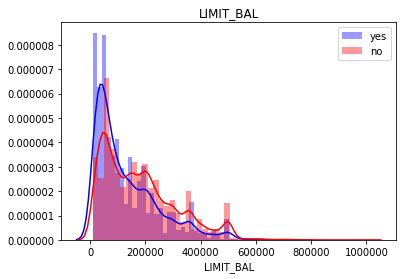

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn是基于matplotlib的python数据可视化库,提供更高层次的API封装,使用起来更加方便快捷。


sns.distplot(x1['LIMIT_BAL'][x1['default payment next month']=='yes'],color='b',label='yes') #distplot( )为hist加强版
sns.distplot(x1['LIMIT_BAL'][x1['default payment next month']=='no'],color='r',label='no')
plt.legend()
plt.title('LIMIT_BAL')
plt.savefig('LIMIT_BAL.png',dpi=600)
plt.show()

### 2.2 年龄

### 2.2.1年龄-default

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


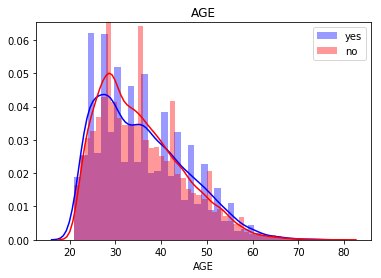

In [6]:
sns.distplot(x5['AGE'][x5['default payment next month']=='yes'],color='b',label='yes')
sns.distplot(x5['AGE'][x5['default payment next month']=='no'],color='r',label='no')
plt.legend()
plt.title('AGE')
plt.savefig('AGE.png',dpi=600)
plt.show()

### 2.2.2 年龄-total 

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


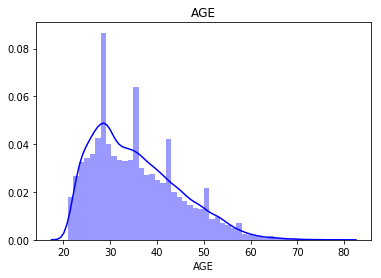

In [7]:
plt.show()
sns.distplot(x5['AGE'],color='b')
#plt.legend() #此图没有图例
plt.title('AGE')
plt.savefig('AGE_total.png',dpi=600)

# 3 绘制离散变量的柱状图

## 3.1 性别

default payment next month  SEX
no                          1       9015
                            2      14349
yes                         1       2873
                            2       3763
dtype: int64
SEX                            1      2
default payment next month             
no                          9015  14349
yes                         2873   3763


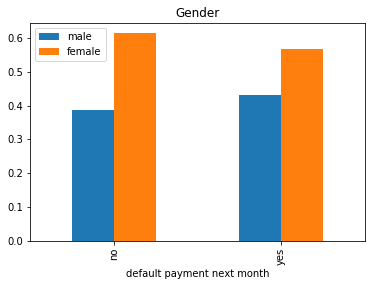

In [8]:
x2=data.groupby(['default payment next month','SEX']).size()
print(x2)
x2=x2.unstack() #unstack和stack的用法：https://blog.csdn.net/zhanshirj/article/details/73456800
print(x2)

x2.loc['yes']=x2.loc['yes']/6636 #6636是'yes'的样本量
x2.loc['no']=x2.loc['no']/23364 #23364是'no'的样本量
x2.plot(kind='bar')
plt.title('Gender')
plt.legend(['male','female'])
plt.savefig('SEX.png',dpi=600)
plt.show()

## 3.2 教育程度

### 3.2.1 教育程度-default

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

default payment next month  EDUCATION
no                          1             8549
                            2            10700
                            3             3680
                            4              435
yes                         1             2036
                            2             3330
                            3             1237
                            4               33
dtype: int64
EDUCATION                      1      2     3    4
default payment next month                        
no                          8549  10700  3680  435
yes                         2036   3330  1237   33


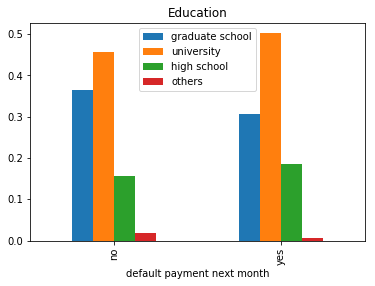

In [9]:
data.loc[:,'EDUCATION'][data['EDUCATION']==0] = 4
data.loc[:,'EDUCATION'][data['EDUCATION']==5] = 4
data.loc[:,'EDUCATION'][data['EDUCATION']==6] = 4
x3=data.groupby(['default payment next month','EDUCATION']).size()
print(x3)
x3=x3.unstack()
print(x3)

x3.loc['yes']=x3.loc['yes']/6636
x3.loc['no']=x3.loc['no']/23364
x3.plot(kind='bar')
plt.title('Education')
plt.legend(['graduate school','university','high school','others'])
plt.savefig('Education.png',dpi=600)
plt.show()

### 3.2.2 教育_total

EDUCATION
1    10585
2    14030
3     4917
4      468
dtype: int64


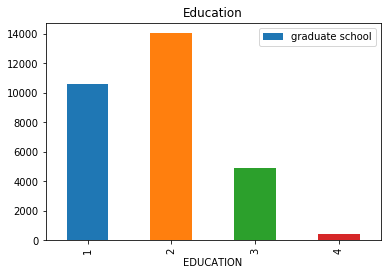

In [10]:
x3_t=data.groupby(['EDUCATION']).size()
print(x3_t)
x3_t.plot(kind='bar')
plt.title('Education')
plt.legend(['graduate school','university','high school','others'])
plt.savefig('Education_total.png',dpi=600)
plt.show()

## 3.3 婚姻状况

X4: Marital status (1 = married; 2 = single; 3 = others). 

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


default payment next month  MARRIAGE
no                          1           10453
                            2           12623
                            3             288
yes                         1            3206
                            2            3341
                            3              89
dtype: int64
MARRIAGE                        1      2    3
default payment next month                   
no                          10453  12623  288
yes                          3206   3341   89


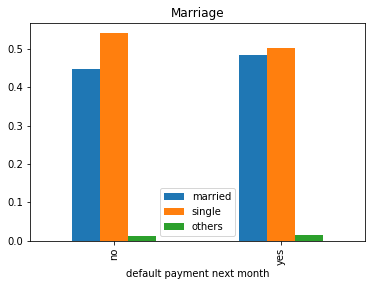

In [11]:
data.loc[:,'MARRIAGE'][data['MARRIAGE']==0] = 3
x4=data.groupby(['default payment next month','MARRIAGE']).size()
print(x4)
x4=x4.unstack()
print(x4)
x4.loc['yes']=x4.loc['yes']/6636
x4.loc['no']=x4.loc['no']/23364
x4.plot(kind='bar')
plt.title('Marriage')
plt.legend(['married','single','others'])
plt.savefig('Marriage.png',dpi=600)
plt.show()